### Data Exploration

In [83]:
#import packages
import os
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Data Import

**We import the NBA and NCAA datasets below**

*NBA Dataset*

In [2]:
filepath = os.path.join(os.getcwd(),"..","Data","NBA","NBA_Shot_Locations_1997-2020.csv")
nba = pd.read_csv(filepath)

In [4]:
nba.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
0,29700427,389,100,Tim Legler,1610612764,Washington Wizards,4,11,22,Jump Shot,...,Right Side(R),8-16 ft.,15,117,109,1,19980102,WAS,IND,Regular Season
1,29700427,406,100,Tim Legler,1610612764,Washington Wizards,4,9,36,Jump Shot,...,Right Side(R),8-16 ft.,14,143,25,0,19980102,WAS,IND,Regular Season
2,29700427,475,100,Tim Legler,1610612764,Washington Wizards,4,3,7,Jump Shot,...,Left Side(L),8-16 ft.,10,-87,55,0,19980102,WAS,IND,Regular Season
3,29700427,487,100,Tim Legler,1610612764,Washington Wizards,4,1,45,Jump Shot,...,Center(C),Less Than 8 ft.,5,-1,53,0,19980102,WAS,IND,Regular Season
4,29700427,497,100,Tim Legler,1610612764,Washington Wizards,4,0,45,Jump Shot,...,Right Side(R),8-16 ft.,14,89,113,0,19980102,WAS,IND,Regular Season


*NCAA Dataset*

In [14]:
filepath = os.path.join(os.getcwd(),"..","Data","NCAA")

ncaa = pd.DataFrame()

for filename in sorted(os.listdir(filepath)):
    
    if filename != ".DS_Store":
        temp = pd.read_csv(os.path.join(filepath, filename))
        ncaa = pd.concat([ncaa, temp])


/var/folders/pg/lb4mzm5n1mg0m6p77fyqjrr80000gn/T/ipykernel_32165/1354094728.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(os.path.join(filepath, filename))
/var/folders/pg/lb4mzm5n1mg0m6p77fyqjrr80000gn/T/ipykernel_32165/1354094728.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(os.path.join(filepath, filename))
/var/folders/pg/lb4mzm5n1mg0m6p77fyqjrr80000gn/T/ipykernel_32165/1354094728.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(os.path.join(filepath, filename))
/var/folders/pg/lb4mzm5n1mg0m6p77fyqjrr80000gn/T/ipykernel_32165/1354094728.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(os.path.join(filepath, filename))
/var/folders/pg/lb4mzm5n1mg0m6p77fyqjrr80000gn/T

In [26]:
sample = pd.read_csv("/Users/chejeong/Desktop/da401_ncaa-shot-data-000000000000.csv")

/var/folders/pg/lb4mzm5n1mg0m6p77fyqjrr80000gn/T/ipykernel_32165/3259032190.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  sample = pd.read_csv("/Users/chejeong/Desktop/da401_ncaa-shot-data-000000000000.csv")


In [23]:
sample =  pd.read_csv(os.path.join(os.getcwd(),"..","Data","NCAA","da401_ncaa-shot-data-000000000000"))

for _ in sample.columns:
    print(_, ": ",type(sample[_].dtype), "\n")



game_id :  <class 'numpy.dtype[object_]'> 

load_timestamp :  <class 'numpy.dtype[object_]'> 

season :  <class 'numpy.dtype[int64]'> 

status :  <class 'numpy.dtype[object_]'> 

scheduled_date :  <class 'numpy.dtype[object_]'> 

venue_id :  <class 'numpy.dtype[object_]'> 

venue_name :  <class 'numpy.dtype[object_]'> 

venue_city :  <class 'numpy.dtype[object_]'> 

venue_state :  <class 'numpy.dtype[object_]'> 

venue_address :  <class 'numpy.dtype[object_]'> 

venue_zip :  <class 'numpy.dtype[object_]'> 

venue_country :  <class 'numpy.dtype[object_]'> 

venue_capacity :  <class 'numpy.dtype[float64]'> 

attendance :  <class 'numpy.dtype[float64]'> 

neutral_site :  <class 'numpy.dtype[object_]'> 

conference_game :  <class 'numpy.dtype[object_]'> 

tournament :  <class 'numpy.dtype[object_]'> 

tournament_type :  <class 'numpy.dtype[object_]'> 

round :  <class 'numpy.dtype[object_]'> 

game_no :  <class 'numpy.dtype[object_]'> 

away_market :  <class 'numpy.dtype[object_]'> 

away_

In [27]:
ncaa.to_csv("/Users/chejeong/Desktop/ncaa_shot_log.csv")

In [3]:
sample = pd.read_csv("/Users/chejeong/Desktop/ncaa_shot_log.csv")

/var/folders/pg/lb4mzm5n1mg0m6p77fyqjrr80000gn/T/ipykernel_44712/3682453584.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  sample = pd.read_csv("/Users/chejeong/Desktop/ncaa_shot_log.csv")


In [49]:
shots = sample[['game_id','load_timestamp','season','away_name','away_id','away_alias','home_name','home_id','home_alias',
               'period','game_clock','elapsed_time_sec','team_name','team_id','team_alias','team_basket','possession_team_id',
               'player_id','player_full_name','event_id','timestamp','event_coord_x','event_coord_y','event_type','type','shot_made',
               'shot_type','shot_subtype','three_point_shot','points_scored','timeout_duration']]

In [131]:
shots = shots.loc[shots['type'] == 'fieldgoal']
shots = shots[shots['team_basket'].notna()]


duke = shots.loc[shots['team_name'] == 'Blue Devils']

for index, row in duke.iterrows():
    
    if duke.loc[index,'team_basket'] == "right":
        duke.loc[index,'team_basket'] = "left"
        duke.loc[index,'event_coord_x'] = 1128 - duke.loc[index,'event_coord_x']
        duke.loc[index,'event_coord_y'] = 600 - duke.loc[index,'event_coord_y']

duke = duke[duke['event_coord_x'] < 564]
        
#2013 <= season <= 2017
duke_2013 = duke.loc[duke['season'] == 2013]
duke_2014 = duke.loc[duke['season'] == 2014]
duke_2015 = duke.loc[duke['season'] == 2015]
duke_2016 = duke.loc[duke['season'] == 2016]
duke_2017 = duke.loc[duke['season'] == 2017]


In [133]:
shots.team_name.unique()

array(['Hawks', 'Braves', 'Bulldogs', 'Broncos', 'Cardinals',
       'Retrievers', 'Rockets', 'Pioneers', 'Green Wave', 'Red Flash',
       'Rebels', 'Colonials', 'Bobcats', 'Tigers', 'Aggies', 'Lions',
       'Golden Grizzlies', 'Monarchs', 'Cornhuskers', 'Pilots', 'Spiders',
       'Falcons', 'Highlanders', 'Catamounts', 'Cowboys', 'Mustangs',
       'Wildcats', 'Dukes', 'Explorers', 'Thundering Herd', 'Eagles',
       '49ers', 'Crimson', 'Purple Eagles', 'Redhawks', 'Blue Raiders',
       'Norse', 'Dons', 'Knights', 'Miners', 'Racers', 'Vikings',
       'Salukis', 'Rams', 'Owls', 'Minutemen', 'Hilltoppers', 'Cougars',
       'Bearcats', 'Fightin Blue Hens', 'Titans', 'Pirates', 'Patriots',
       'Warriors', 'Bulls', "Ragin' Cajuns", 'Mavericks', 'Jaspers',
       'Lumberjacks', 'Wolf Pack', 'Ducks', 'Grizzlies', 'Bisons',
       'Lancers', 'Terriers', 'Blackbirds', 'Bears', 'Huskies', 'Ospreys',
       'Bluejays', 'Mountaineers', 'Roadrunners', 'Paladins', 'Blazers',
       'Black 

In [148]:
duke = shots.loc[shots['team_name'] == 'Trojans']

for index, row in duke.iterrows():
    
    if duke.loc[index,'team_basket'] == "right":
        duke.loc[index,'team_basket'] = "left"
        duke.loc[index,'event_coord_x'] = 1128 - duke.loc[index,'event_coord_x']
        duke.loc[index,'event_coord_y'] = 600 - duke.loc[index,'event_coord_y']

duke = duke[duke['event_coord_x'] < 564]
        
#2013 <= season <= 2017
duke_2013 = duke.loc[duke['season'] == 2013]
duke_2014 = duke.loc[duke['season'] == 2014]
duke_2015 = duke.loc[duke['season'] == 2015]
duke_2016 = duke.loc[duke['season'] == 2016]
duke_2017 = duke.loc[duke['season'] == 2017]

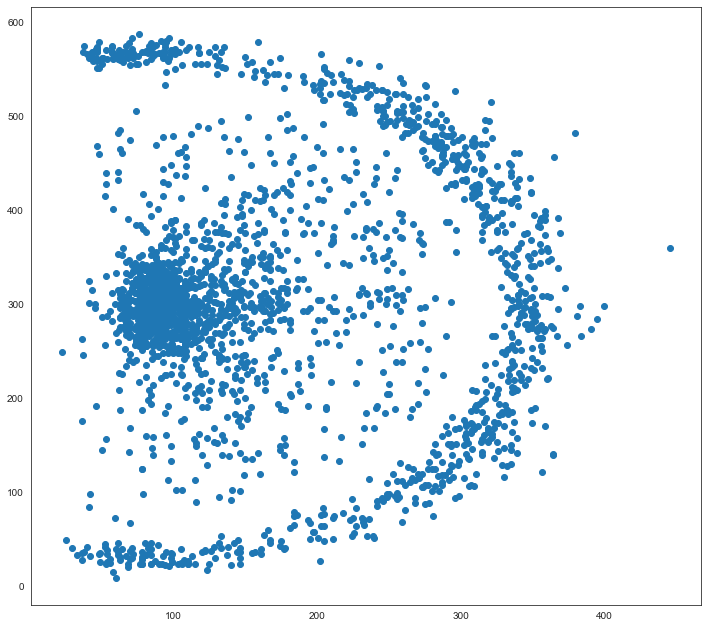

In [151]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(duke_2017.event_coord_x, duke_2017.event_coord_y)
plt.show()

In [225]:
from matplotlib.patches import Circle, Rectangle, Arc

#event_coord_x: The location of the play in number of inches from the "left" baseline, max 1128
#event_coord_y: The location of the play in inches from the "top" sideline, max 600


def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of NCAA basketball court

    # Create the basketball hoop. Radius of hoop 9"
    hoop = Circle((63, 300), radius=9, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((48, 264), 2, 72, linewidth=lw, color=color)

    # The paint. width=228in, height=144in
    paint = Rectangle((0, 228), 228, 144, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((228, 300), 144, 144, theta1=270, theta2=90,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((228, 300), 144, 144, theta1=90, theta2=270,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((63, 300), 96, 96, theta1=270, theta2=90, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((0, 561.5), 109, 0, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((0, 38.5), 109, 0, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((63, 300), 531.5, 531.5, theta1=280, theta2=80, linewidth=lw,
                    color=color)

    # Center Court
    center_arc = Arc((564, 300), 144, 144, theta1=90, theta2=270,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, paint, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((0, 0), 564, 600, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

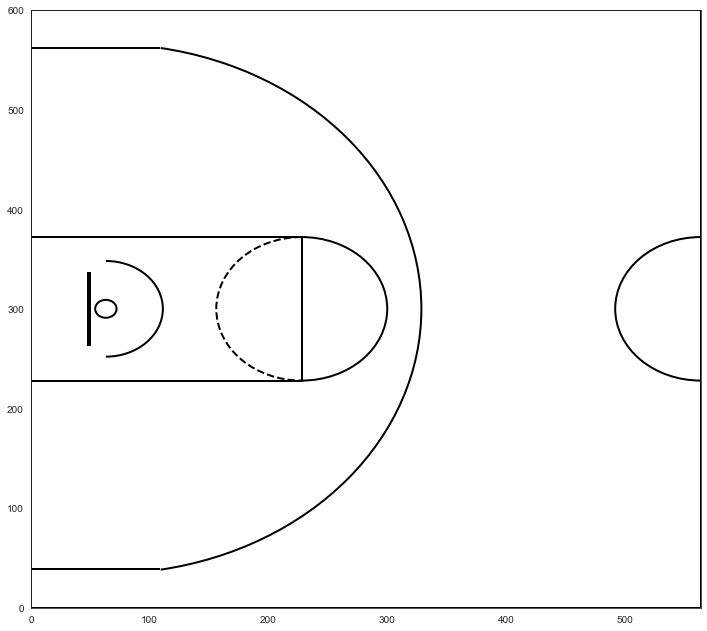

In [227]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(0,564)
plt.ylim(0,600)
plt.show()

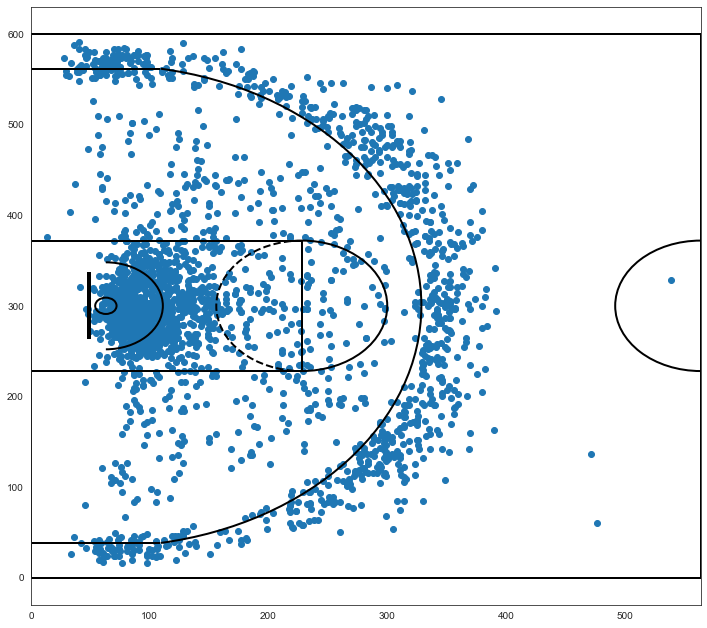

In [229]:
plt.figure(figsize=(12,11))
plt.scatter(duke_2016.event_coord_x,duke_2016.event_coord_y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(0,564)
plt.show()

event_coord_x: The location of the play in number of inches from the "left" baseline, max 1128

event_coord_y: The location of the play in inches from the "top" sideline, max 600

In [55]:
shots.loc[shots['team_basket']== "right"]

,game_id,load_timestamp,season,away_name,away_id,away_alias,home_name,home_id,home_alias,period,...,event_coord_x,event_coord_y,event_type,type,shot_made,shot_type,shot_subtype,three_point_shot,points_scored,timeout_duration
0,08b245ae-e35e-45b1-8184-868bd54ec163,2018-03-07 03:00:00 UTC,2017,Hawks,dba620d9-7282-4638-bf05-13caf48eeed1,HART,Retrievers,32755362-6336-4dd3-ac34-6f72a6cc150b,UMBC,2,...,796.0,147.0,threepointmiss,fieldgoal,False,jump shot,NaN,True,NaN,NaN
1,5d3e89b0-5f06-4746-be78-2ef34350b63f,2018-02-15 17:01:09.500656 UTC,2017,Eagles,4b3ff02c-e0ba-435b-a565-6075bc491684,BC,Hawks,dba620d9-7282-4638-bf05-13caf48eeed1,HART,2,...,195.0,410.0,rebound,rebound,False,NaN,NaN,False,NaN,NaN
2,84707465-95e5-463e-bd75-71cbacd5830c,2018-02-01 12:12:40.589349 UTC,2016,Purple Eagles,f7575278-12ec-494a-b544-427c1759d43d,NIAG,Hawks,dba620d9-7282-4638-bf05-13caf48eeed1,HART,2,...,894.0,310.0,freethrowmiss,freethrow,False,NaN,NaN,False,NaN,NaN
4,565498b3-afbd-456a-b79b-00fc235fbf12,2018-02-02 09:06:32.705048 UTC,2015,Bulls,a9f5c9a2-342c-4881-9996-5d5c05ec9bd9,BUFF,Bobcats,327f09e2-e75f-4014-8ef7-caf9202cd583,OHIO,1,...,236.0,311.0,rebound,rebound,False,NaN,NaN,False,NaN,NaN
5,edd0aa62-7d48-4114-bcbe-9564ab2bb89d,2018-02-01 14:33:34.057652 UTC,2015,Tigers,0c0608b3-f349-4f5e-9a10-7e6a744dd0d2,AUB,Crimson,5c7bf63f-bc39-43c5-9907-73b50b7a6b34,HARV,2,...,120.0,290.0,rebound,rebound,False,NaN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119692,19ae3719-2fc1-4d1c-960f-86f87722b19e,2018-02-01 15:09:15.094064 UTC,2014,Panthers,2c93a75d-5449-4ec1-9ca2-1e6c812399a4,UNI,Shockers,f38b58de-3273-4723-a78b-2f918e9aa2d5,WICH,1,...,208.0,400.0,rebound,rebound,False,NaN,NaN,False,NaN,NaN
4119693,4284387d-4929-4762-813a-6b138163a2d3,2018-02-01 15:27:22.283444 UTC,2014,Braves,b47d10b8-a2a5-47df-a2f9-7bd0b9d51beb,BRAD,Shockers,f38b58de-3273-4723-a78b-2f918e9aa2d5,WICH,1,...,1052.0,286.0,assist,twopointmade,False,NaN,NaN,False,NaN,NaN
4119694,a7f0642e-589d-42c1-a065-bf2216196525,2018-03-10 23:35:00 UTC,2017,Cougars,1f99a164-d593-4d81-85d5-0d7889d6f486,HOU,Shockers,f38b58de-3273-4723-a78b-2f918e9aa2d5,WICH,1,...,253.0,78.0,personalfoul,personalfoul,False,NaN,NaN,False,NaN,NaN
4119695,0ccb6184-7abc-4035-ad14-6b2c405ee002,2018-02-02 08:34:25.766707 UTC,2016,Braves,b47d10b8-a2a5-47df-a2f9-7bd0b9d51beb,BRAD,Shockers,f38b58de-3273-4723-a78b-2f918e9aa2d5,WICH,2,...,948.0,296.0,twopointmiss,fieldgoal,False,jump shot,NaN,False,NaN,NaN


In [79]:
shots['team_basket'].unique()

array(['right', 'left', nan], dtype=object)